# DS106 Capstone Project : Exploratory Data Analysis


## 1.  Import Relevant Libraries and Dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
import seaborn as sns

sns.set_style('whitegrid')

import re
import string

import gensim
import gensim.downloader as api
import nltk
from cleantext import clean
from gensim.corpora.dictionary import Dictionary
from gensim.models.keyedvectors import KeyedVectors
from gensim.summarization import keywords
from gensim.test.utils import common_texts
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('stopwords')
#nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from pylab import rcParams
from sklearn.feature_extraction.text import (CountVectorizer, TfidfTransformer,
                                             TfidfVectorizer)
from wordcloud import WordCloud

#nltk.download('vader_lexicon')
import pickle
import unicodedata
import warnings

import contractions
import pyLDAvis
import pyLDAvis.gensim_models
import pyLDAvis.gensim_models as gensimvi
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

warnings.filterwarnings('ignore')
import spacy
from spacy.lang.en import English

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()
from spacy.lang.en.stop_words import STOP_WORDS



Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.
C:\Users\yeosi\anaconda3\envs\baseclone\lib\site-packages\sklearn\decomposition\_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [2]:
# Import dataset
final_df = pd.read_csv('final_df.csv')
final_df.head()

,Hotel_Name,Date,Title,Review,Rating,Ori_Rating,Cleaned_Review,Dominant_topic,Perc_Contrib,Topic_Keywords,TextBlob_Polarity,Pol_Rating,Topic,Review_Len,Year
0,ibis budget Singapore Pearl,April 2022,When they say budget they mean budget,When they say budget they really mean budget. ...,2,Negative,say budget really mean budget double basically...,0,0.5293,"clean, good, small, walk, staff, location, mrt...",0.001923,Neutral,Location,89,2022
1,ibis budget Singapore Pearl,January 2021,Poor customer service,This hotel does not live up to expectation of ...,3,Neutral,live expectation service standard accord membe...,1,0.3879,"staff, u, service, front, desk, friendly, good...",-0.077597,Negative,Service,54,2021
2,ibis budget Singapore Pearl,February 2020,It's okay,We stayed 4 nights. We got free room promotion...,3,Neutral,stayed night get free promotion double family ...,0,0.6708,"clean, good, small, walk, staff, location, mrt...",0.120055,Neutral,Location,98,2020
3,ibis budget Singapore Pearl,February 2020,Average stay,Located in an area that looks a little more ru...,3,Neutral,locate area look little run rest felt safe alt...,0,0.6372,"clean, good, small, walk, staff, location, mrt...",0.209201,Positive,Location,80,2020
4,ibis budget Singapore Pearl,January 2020,Good budget Hotel,Ibis pearl is good budget hotel in geylang are...,3,Neutral,pearl good budget geylang area compact amenity...,0,0.9890,"clean, good, small, walk, staff, location, mrt...",0.400000,Positive,Location,53,2020


In [5]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3874 entries, 0 to 3873
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hotel_Name         3874 non-null   object 
 1   Date               3874 non-null   object 
 2   Title              3874 non-null   object 
 3   Review             3874 non-null   object 
 4   Rating             3874 non-null   int64  
 5   Ori_Rating         3874 non-null   object 
 6   Cleaned_Review     3874 non-null   object 
 7   Dominant_topic     3874 non-null   int64  
 8   Perc_Contrib       3874 non-null   float64
 9   Topic_Keywords     3874 non-null   object 
 10  TextBlob_Polarity  3874 non-null   float64
 11  Pol_Rating         3874 non-null   object 
 12  Topic              3874 non-null   object 
 13  Review_Len         3874 non-null   int64  
 14  Year               3874 non-null   int64  
dtypes: float64(2), int64(4), object(9)
memory usage: 454.1+ KB


## 5. Exploratory Data Analysis 

The EDA section allows visualisation of the results of topic modelling and sentiment analysis. These two work hand in hand to provide useful and essential insights into the guests' experience and the specific aspects of the hotel that they are reviewing about. Hotel managers can then pinpoint the specific aspect to improve on and also know the aspects which hotel guests are positive about. 

### (a) General EDA for the reviews, sentiments and topics

**Comparison between sentiments generated by textblob and actual sentiments of hotel guests**

In [6]:
df2 = final_df[['Pol_Rating', 'Ori_Rating']]

Text(0.5, 1.0, 'Comparison between Ratings and Polarity Ratings')

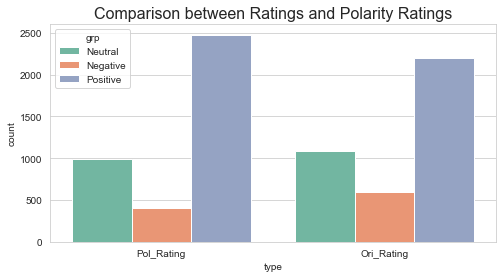

In [7]:
df2 = df2.melt(var_name='type', value_name='grp')
plt.figure(figsize = (8, 4))
sns.countplot(hue='grp', x='type', data=df2, palette = 'Set2').set_title('Comparison between Ratings and Polarity Ratings', fontsize = 16)

Sentiments generated by TextBlob are similar to the sentiments from the original ratings given by hotel guests.


**Distribution of review percentage contribution and sentiment polarity**

Text(0.5, 1.0, 'Sentiments Polarity Distribution')

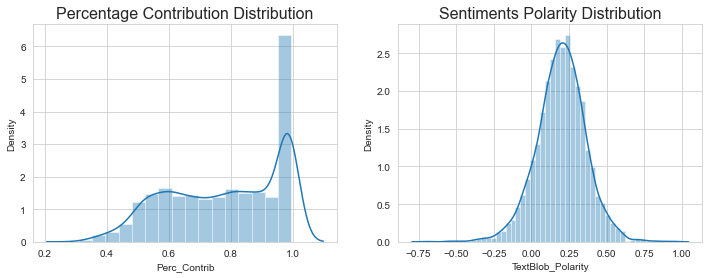

In [8]:
fig, axes = plt.subplots(1,2,figsize=(12,4))
sns.distplot(final_df['Perc_Contrib'] ,ax = axes[0]).set_title('Percentage Contribution Distribution', fontsize = 16)
sns.distplot(final_df['TextBlob_Polarity'] ,ax = axes[1]).set_title('Sentiments Polarity Distribution', fontsize = 16)

From the histograms, most of the reviews provided substantial percentage contribution (> 50%) to the topics, which is a sign of good topic modelling. The sentiments generated by Textblob are mostly on the positive side. 

**Find out the most common words used in Positive and Negative sentiment groups** 

In [9]:
# create individual df for processed reviews that are positive and negative respectively
# This for finding the count of the most common words
positive = final_df.loc[final_df['Pol_Rating']== 'Positive', 'Cleaned_Review']
negative = final_df.loc[final_df['Pol_Rating']== 'Negative', 'Cleaned_Review']

In [10]:
#Find the top 10 common words in positive review
fdistp = nltk.FreqDist(" ".join(positive).split()).most_common(10)
pos_c_words = pd.DataFrame(fdistp,columns = ['words', 'count'])

#Find the top 10 common words in negative review
fdistn = nltk.FreqDist(" ".join(negative).split()).most_common(10)
neg_c_words = pd.DataFrame(fdistn,columns = ['words', 'count'])

(0.0, 2500.0)

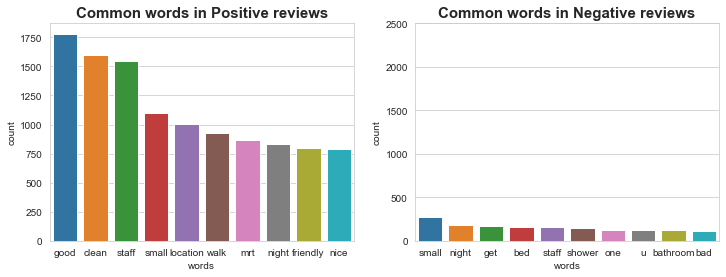

In [11]:
#plot bar chart for comparison
fig, axes = plt.subplots(1,2,figsize=(12,4))
sns.barplot(x = pos_c_words['words'], y=pos_c_words['count'],ax = axes[0]).set_title('Common words in Positive reviews', fontsize = 15, weight = 'bold')
sns.barplot(x = neg_c_words['words'], y=neg_c_words['count'],ax = axes[1]).set_title('Common words in Negative reviews', fontsize = 15, weight = 'bold')
plt.ylim(0,2500)

The common positive words seem to focus on the hotel location and service, while the common negative words focus on the room amenities and hygiene issues. 

**Review count across hotel branches**

Text(0.5, 1.0, 'No. of Reviews across Hotel Branches')

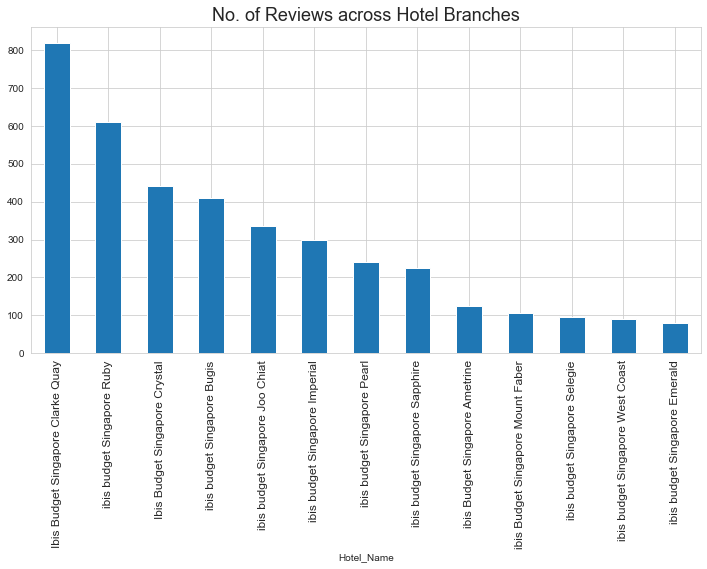

In [12]:
plt.figure(figsize = (12, 6))
final_df.groupby('Hotel_Name')['Review'].count().sort_values(ascending = False).plot(kind = 'bar')
plt.xticks(rotation=90, fontsize = 12)
plt.title('No. of Reviews across Hotel Branches', fontsize = 18)

The top 3 hotel branches are Clarke Quay, Ruby and Crystal. It would be good to look into the main sentiments and topics of their online reviews later on. 

**Sentiment Polarity across hotel branches**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'ibis budget Singapore Pearl'),
  Text(1, 0, 'ibis Budget Singapore Mount Faber'),
  Text(2, 0, 'ibis budget Singapore Emerald'),
  Text(3, 0, 'ibis budget Singapore West Coast'),
  Text(4, 0, 'ibis Budget Singapore Ametrine'),
  Text(5, 0, 'ibis budget Singapore Imperial'),
  Text(6, 0, 'ibis budget Singapore Joo Chiat'),
  Text(7, 0, 'ibis budget Singapore Bugis'),
  Text(8, 0, 'Ibis Budget Singapore Clarke Quay'),
  Text(9, 0, 'Ibis Budget Singapore Crystal'),
  Text(10, 0, 'ibis budget Singapore Ruby'),
  Text(11, 0, 'ibis budget Singapore Sapphire'),
  Text(12, 0, 'ibis budget Singapore Selegie')])

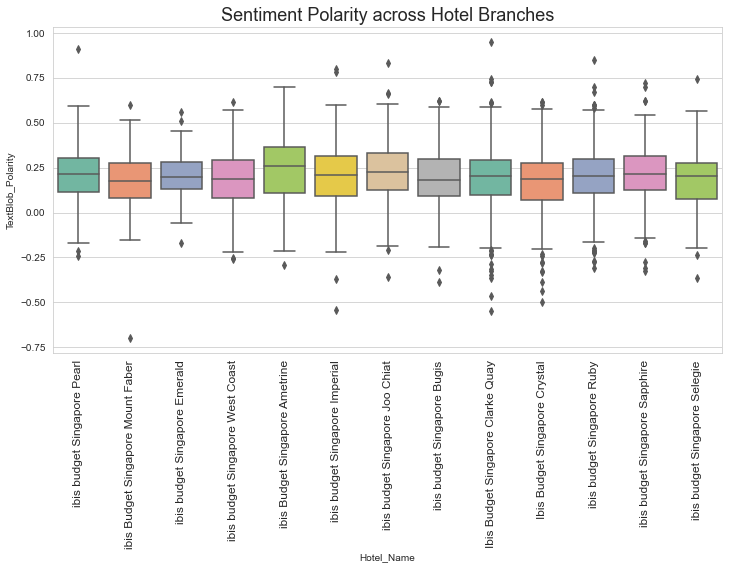

In [13]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Hotel_Name', y = 'TextBlob_Polarity', data = final_df, palette = 'Set2').set_title('Sentiment Polarity across Hotel Branches', fontsize = 18)
plt.xticks(rotation=90, fontsize = 12)

The average sentiment polarity seems to be around 0.20 to 0.25 , which means review sentiments are slightly positive. Some branches like West Coast, Mount Faber and Bugis have lower mean polarity score compared to the others.

**Review Length by Sentiments**

Text(0.5, 1.0, 'Length of Review across Topics')

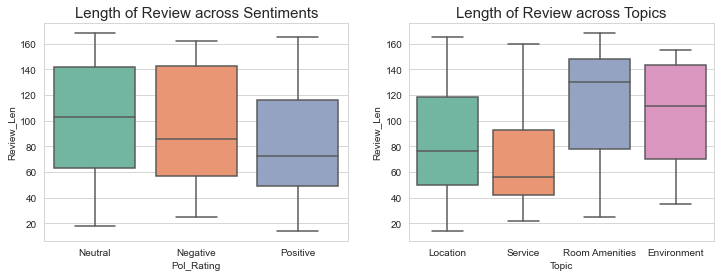

In [14]:
fig, axes = plt.subplots(1,2,figsize=(12,4))
sns.boxplot(x = 'Pol_Rating', y = 'Review_Len', data = final_df, palette = 'Set2' ,ax = axes[0]).set_title('Length of Review across Sentiments', fontsize = 15)
sns.boxplot(x = 'Topic', y = 'Review_Len', data = final_df, palette = 'Set2',ax = axes[1]).set_title('Length of Review across Topics', fontsize = 15)

It seems that hotel guests tend to leave a significantly longer review for room amenities. Since guests actually provided longer reviews for room amenities (regardless of sentiments), the topic on room amenities could be an important one that the hotel management might want to look into. There could be pain points experience by guests for room amenities. Neutral sentiments also tend to have longer review length.

**Visualise the distribution of sentiments across the 5 topics**

Text(0.5, 1.0, 'Sentiments across Topics')

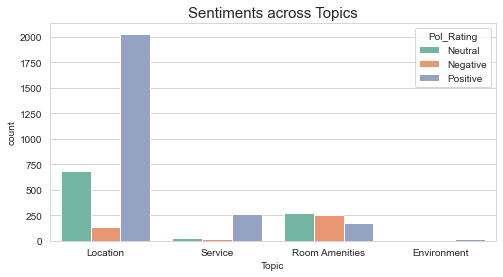

In [15]:
plt.figure(figsize = (8, 4))
sns.countplot( x = 'Topic', data = final_df, hue = 'Pol_Rating', palette = 'Set2' ).set_title('Sentiments across Topics', fontsize = 15)

Ibis budget hotels seem to be doing great for their service as this aspect has the highest number of positive reviews. Their staff and front desk service might have been well-trained and hotel guests provided compliments regarding the good service. Location also seems to be in ibis budget hotels'favor. Most of the hotels'locations are quite accessible by public transport and near various amenities. 

However, the room amenities at ibis budget hotels seem to be lacking as the aspect received the lowest number of positive reviews and relatively higher number of negative reviews compared to other aspects.
This explains the reason why longer reviews were left by hotel guests regarding room amenities (from the previous plot). There could be some serious issues concerning room amenities. More attention should be given to the sentiments for room amenities later on. 

**How do the review sentiments and topics change across the years?** 

Text(0.5, 1.0, 'Topics across Year 2009 - 2022')

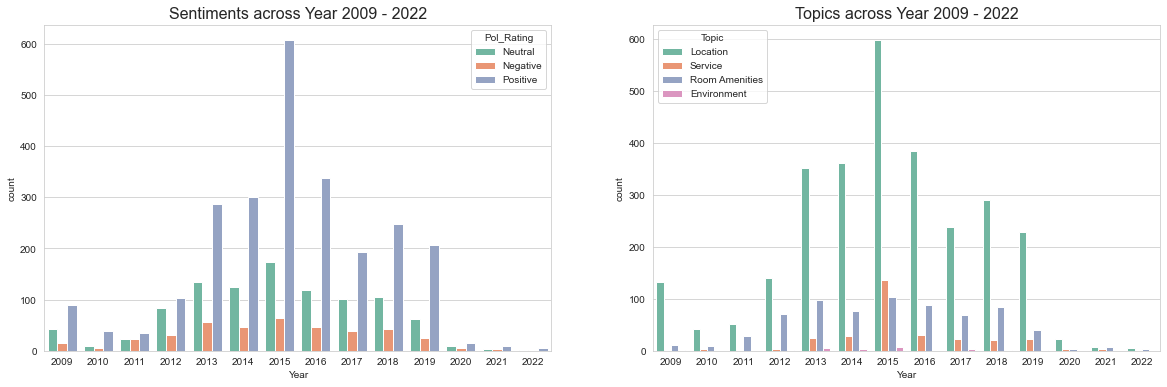

In [16]:
fig, axes = plt.subplots(1,2,figsize=(20,6))
sns.countplot( x = 'Year', data = final_df, hue = 'Pol_Rating', palette = 'Set2' ,ax = axes[0]).set_title('Sentiments across Year 2009 - 2022', fontsize = 16)
sns.countplot( x = 'Year', data = final_df, hue = 'Topic', palette = 'Set2' ,ax = axes[1]).set_title('Topics across Year 2009 - 2022', fontsize = 16)

Reviews from 2020 to 2022 are significantly lesser due to the COVID-19 situation, when the tourism industry was severely affected. However, it can also be observed that positive reviews seem to decrease from 2015 to 2019. In fact, there was a overall significant drop in the number of reviews. This was not a positive trend and it could be due to the drop in hotel guests and occupancy across the hotel branches, which led to lower number of hotel reviews. The hotel management will need to consider ways to improve their overall appeal and increase hotel occupancy during this essential period when Singapore tourism industry starts to reopen. 

Over the years, reviews are also concentrated on Location, service and room amenities. As there were a significant number of reviews on location, it would be good to look at the sentiments for this topic. 

### (b) EDA for sentiments and topics across 13 hotel branches 

**Comparison of sentiments across 13 hotel branches** 

Text(0.5, 1.0, 'Sentiments across Hotel Branches')

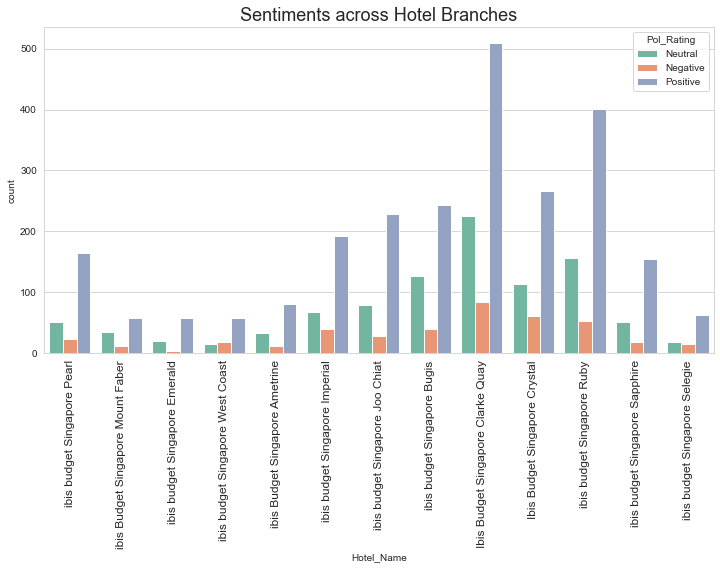

In [17]:
plt.figure(figsize = (12, 6))
sns.countplot( x = 'Hotel_Name', data = final_df, hue = 'Pol_Rating', palette = 'Set2')
plt.xticks(rotation=90, fontsize = 12)
plt.title('Sentiments across Hotel Branches', fontsize = 18)

It is good to see that reviews are still mainly positive for all hotel branches. Across the 13 hotel branches, the top three branches with high number of positive reviews are Clarke Quay, Crystal and Ruby. These three hotels are also the top hotels for number of reviews. It seems like these three branches might also have a higher number of hotel guests compared to the rest due to the acessibility of the location, therefore leading to a higher number of reviews. Logically, due to the higher number of hotel guests, these hotel branches also have a relatively higher number of neutral and negative reviews. 
Hotels branches such as Selegie, Mount Faber and Emerald have lower proportion of negative reviews. 

**Comparison of topics across 13 hotel branches**

Text(0.5, 1.0, 'Topics across Hotel Branches')

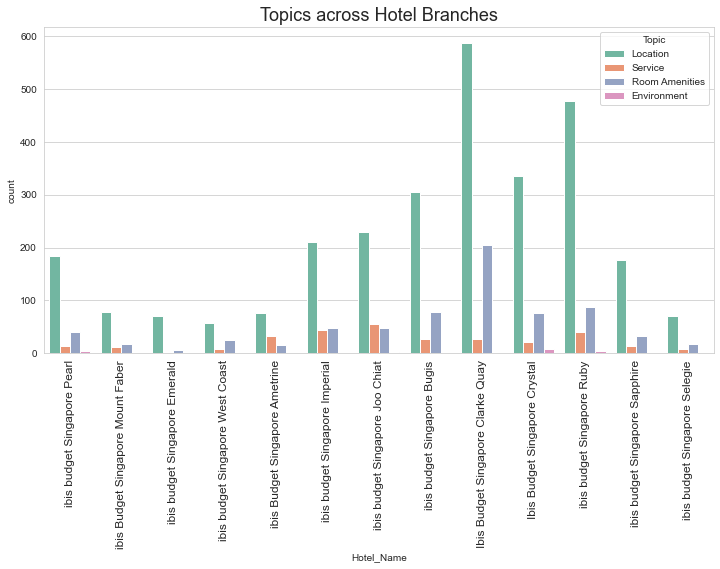

In [18]:
plt.figure(figsize = (12, 6))
sns.countplot( x = 'Hotel_Name', data = final_df, hue = 'Topic', palette = 'Set2')
plt.xticks(rotation=90, fontsize = 12)
plt.title('Topics across Hotel Branches', fontsize = 18)

Across all branches, the most common topics for reviews are Service and Room Amenities. Hotel branch Clarke Quay and Ruby seems to have more reviews on its location and room amenities while hotel branch Joo Chiat, Ruby and Imperial have a higher number of reviews for Service. 

**Compare the sentiments across hotel branches for each topic**

In [19]:
# Create data subsets for each topic 
room_amen = final_df.loc[final_df['Topic']== 'Room Amenities', (['Hotel_Name', 'Pol_Rating'])]
service = final_df.loc[final_df['Topic']== 'Service', (['Hotel_Name', 'Pol_Rating'])]
location = final_df.loc[final_df['Topic']== 'Location', (['Hotel_Name', 'Pol_Rating'])]
environment = final_df.loc[final_df['Topic']== 'Environment', (['Hotel_Name', 'Pol_Rating'])]

In [20]:
final_df['Topic'].unique()

array(['Location', 'Service', 'Room Amenities', 'Environment'],
      dtype=object)

In [21]:
# Create a function to plot the countplots for each topic
def topic_sentiments(df, title):
    plt.figure(figsize = (12, 6))
    sns.countplot( x = 'Hotel_Name', data = df, hue = 'Pol_Rating', palette = 'Set2')
    plt.xticks(rotation=90, fontsize = 12)
    plt.title(title, fontsize = 18)
    plt.legend(loc = 2)

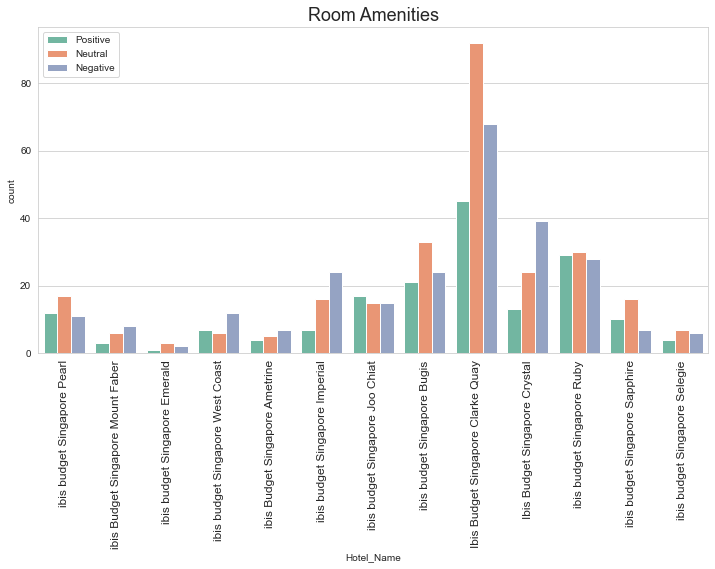

In [22]:
topic_sentiments(room_amen, 'Room Amenities')

Overall, the room amenities fares very poorly. There is a higher proportion of neutral and negative reviews, which shows that this is probably an aspect that the hotel management need to focus on for service recovery. 

Hotel branch Clarke Quay has a significant number of negative and neutral reviews. It seems like the room amenities are seriously lacking for the Clarke Quay branch. The rest of the other branches also had more negative and neutral reviews compared to the positive ones. It is essential that the hotel management look into these reviews to identify areas of
room amenities to improve on. Neutral reviews cannot be neglected as they often contain important details on the areas that can be further improved on. 

The hotel management might want to look more into the reviews for room amenities across all hotel branches and invest more in improving on this area. This is extremely important and urgent as bad room amenities can be a deal-breaker for hotel guests, which will eventually affect the hotel's reputation and revenue in the long run. 

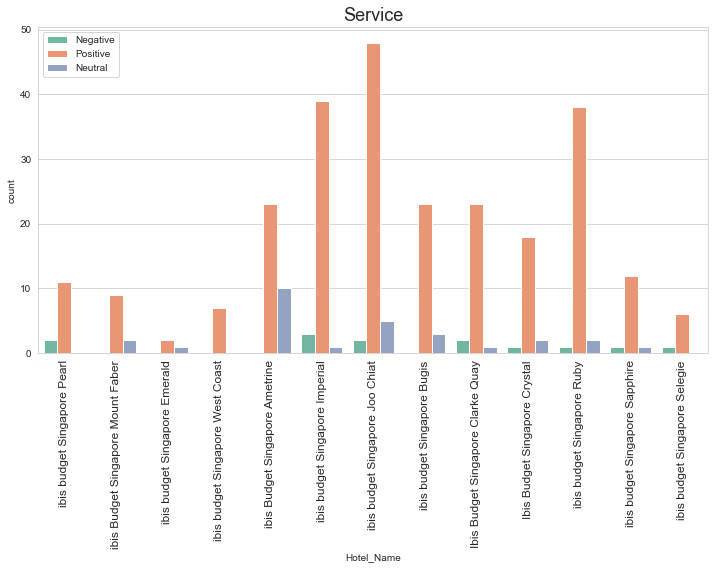

In [23]:
topic_sentiments(service, 'Service')

Overall, the service across all hotel branches seems to be positive. However, some branches like Joo Chiat, Ametrine and Imperial have relatively higher number of neutral and negative reviews. The hotel management might want to improve the service of these branches. They can look into the reviews for service for each hotel branch to better understand what are the exact issues. They might also want to review the service workflow of the branches or even send their service staff for a refresher course or additional training courses. 

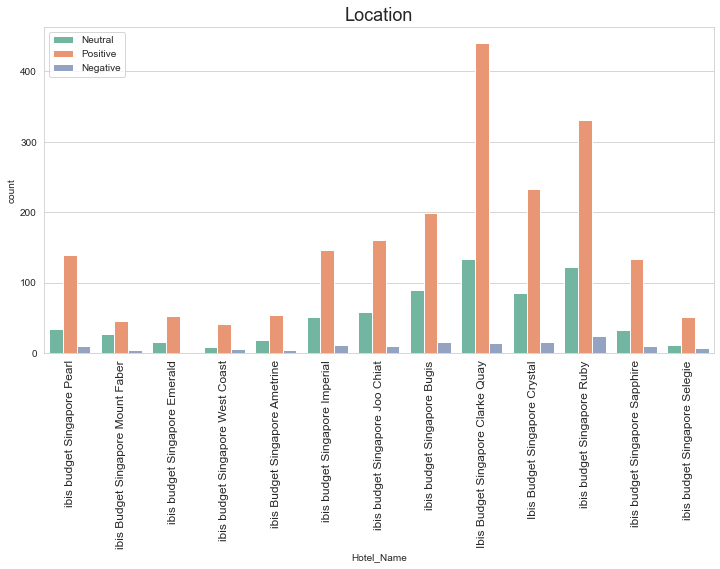

In [24]:
topic_sentiments(location, 'Location')

The location across hotel branches mostly garnered positive and neutral reviews. However, hotel branches like Clarke Quay, Bugis, Pearl, Ruby and Crystal still have a handful of negative reviews. Some of these could be due to its location which is near to the red light district in Geylang or near Night Life spots which may not be suitable for all hotel guests, especially families who are travelling wth young kids and elderly.

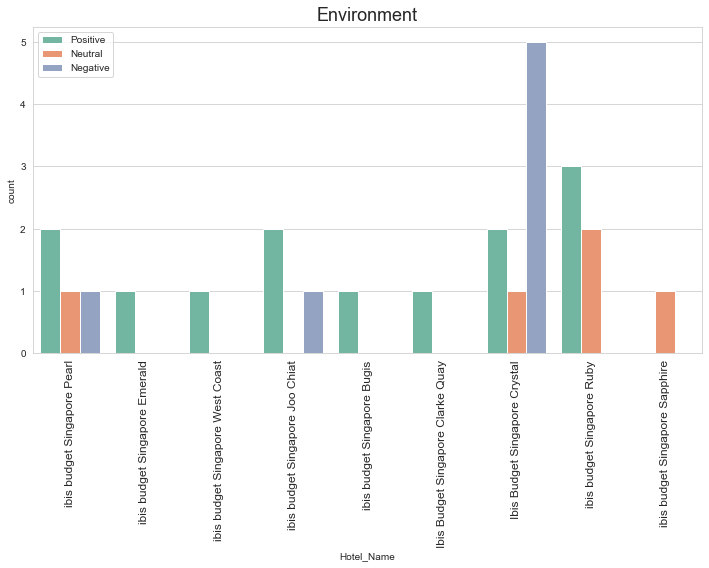

In [25]:
topic_sentiments(environment, 'Environment')

Although this topic on environment around the hotel branches takes up a small proportion of the reviews, it is still important to understand how hotel guests feel about the surroundings. This will allow the management to refine their target groups or consider a better location if possible. 

Hotel branches like Pearl, Joo Chiat and Crystal have negative reviews for environment around the hotel. As most of the reviews are focused on the surrounding red light district in the Geylang area, hotel guests staying in these hotel branches might have mixed or negative sentiments of such areas. This can be especially so for families with young children or elderly. 

# 6. Summary

Topic modelling and sentiment analysis helps ibis budget Singapore to uncover the underlying topics and sentiments from online reviews. This can be helpful for the hotel management to identify areas of improvement and areas that they have done well. 

**Overall, ibis budget Singapore has done well in terms of :**
1. Location
2. Service

**Areas to improve on:**
1. Room Amenities 
2. Environment 

**There are also a few hotel branches which requires attention for specific areas:**

1. Room Amenities - All hotel branches 
2. Service - Ametrine, Joo Chiat, Imperial 
3. Environment - Pearl, Joo Chiat, Crystal 
4. Location - Clarke Quay, Bugis, Pearl, Ruby and Crystal

For the areas to be improved, the hotel management might want to look closely at those related reviews and get a better sensing of the issues before they conduct service recovery to address the pain points highlighted by hotel guests. 